# Logistic classification model - Binary Classification
### Will a person leave the company or stay?

Previously we used linear regression to predict numeric values for home prices etc. But what if we are dealing with categorical data, like whether a person will buy insurance or not. In that case we use logistic classification to solve these classification problems. 

We will determine with the help of a dataset whether a person will leave a company based on various factors. Our result will be either 0 or 1, where 1 == leaving. This type of problem is callled binary classification. 

We will first do some data exploratory and graphing analysis, then build a classifier model and test its accuracy using the split train test method.

[Graph difference between linear and logistic regression](https://www.google.com/imgres?imgurl=http%3A%2F%2Fres.cloudinary.com%2Fdyd911kmh%2Fimage%2Fupload%2Ff_auto%2Cq_auto%3Abest%2Fv1534281070%2Flinear_vs_logistic_regression_edxw03.png&imgrefurl=https%3A%2F%2Fwww.datacamp.com%2Fcommunity%2Ftutorials%2Funderstanding-logistic-regression-python&docid=e4yA2WyAQDDW5M&tbnid=tbmX3O20x80JHM%3A&vet=10ahUKEwjwyNHE--fjAhVRAp0JHQG5AZoQMwiAASgLMAs..i&w=725&h=327&bih=754&biw=1536&q=logistic%20regression%20graph&ved=0ahUKEwjwyNHE--fjAhVRAp0JHQG5AZoQMwiAASgLMAs&iact=mrc&uact=8)
Good to know when trying to figure out what type of regression model to use on a certain dataset

In [ ]:
import pandas as pd
from sklearn import linear_model

df = pd.read_csv("datasets/HR_employee_info.csv")
df.sample(5, random_state = 1)

# Left = 1 means the person left the company while left = 0 means the person is still working there

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11908,0.67,0.39,2,207,7,0,0,0,sales,medium
10508,0.51,0.98,4,245,3,0,0,0,support,medium
9193,0.66,0.54,2,136,2,0,0,0,technical,low
13087,0.53,0.81,3,275,2,0,0,0,technical,low
506,0.83,0.98,4,259,5,0,1,0,support,medium


In [ ]:
num_left = len(df[df["left"] == 1])
print("Number of people who left company out of 14999:", num_left)

Number of people who left company out of 14999: 3571


In [ ]:
df.isnull().sum()                 # Checks if any NaN values in all columns. There are none so thats good, saves us work

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
left = df.groupby("left").mean()
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Satisfaction level & promotion percentage is lower for people who left the company while people who left put in more average monthly hours as well as stayed longer time with the company before leaving. 

Perhaps they left after failing to get a promotion despite putting in more effort into the company than others?

In [ ]:
salary = pd.crosstab(df["salary"], df["left"])              # crosstab helps us see the frequency of people who left or remained with respect to salary as an index
salary                                                      # pd.crosstab(index, column)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


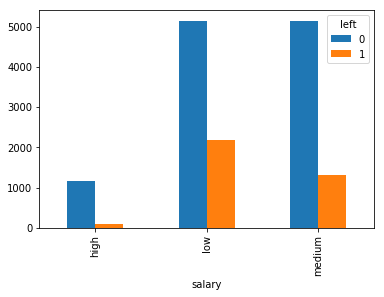

In [ ]:
salary.plot(kind = "bar")

As you can see, a majority of people who left had a low salary, and a substantial number had a medium salary. 

Therefore we can infer that salary played a huge role in the person leaving the company

In [ ]:
salary_ohe = pd.get_dummies(df["salary"])
new_df = df.join(salary_ohe)
x = new_df.drop(["salary", "Department", "number_project", "time_spend_company", "last_evaluation", "left", "Work_accident"], axis = "columns")
x.head()

# x dataframe holds all our potential attributes for training the model

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

y = df["left"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict(x_test)

array([0, 0, 1, ..., 1, 0, 0])

In [ ]:
print("Accuracy of the model (%):", (model.score(x_test, y_test))*100)

Accuracy of the model (%): 77.92
